In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')

df = pd.read_csv('Bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [2]:
lst_type = ['yes', 'no']
df_clf = df[df['y']==lst_type[0]]

for i in range(1, len(lst_type)):
    df_clf = df_clf.append(df[df['y']==lst_type[i]])

X = df_clf[['age', 'balance', 'duration', 'campaign', 'previous']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)
print(X_std.shape)

[[ 1.70113894  0.32210648  3.04373179 -0.56935064 -0.25194037]
 [ 1.418617   -0.43263972  4.69405723 -0.56935064 -0.25194037]
 [ 0.00600734 -0.03030548  4.39117397 -0.56935064 -0.25194037]
 ...
 [-0.65321051  0.03702393  3.52523851  0.07622994  4.95771444]
 [ 1.51279098 -0.22802402  0.97014641  0.39902023 -0.25194037]
 [-0.37068857  0.52836436  0.39932797 -0.24656035  4.52357654]]
(45211, 5)


In [3]:
t1, t2 = 'yes', 'no'
df_clf = df[(df['y']==t1) | (df['y']==t2)]
df_clf = df_clf[['y','age', 'balance']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['age', 'balance']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)
print(X_std.shape)

[[ 1.60696496  0.25641925]
 [ 0.28852927 -0.43789469]
 [-0.74738448 -0.44676247]
 ...
 [ 2.92540065  1.42959305]
 [ 1.51279098 -0.22802402]
 [-0.37068857  0.52836436]]
(45211, 2)


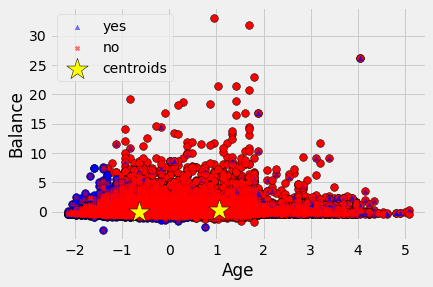

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X_std)

def plt_scatter(X_std, y_pred, km):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std[y_pred==0, 0], 
                X_std[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std[y_pred==1, 0], 
                X_std[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std[idx_0[0], 0], 
                X_std[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std[idx_1[0], 0], 
                X_std[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    plt.scatter(km.cluster_centers_[:, 0], 
                km.cluster_centers_[:, 1], 
                s=500, marker='*', c='yellow', 
                edgecolor='black', label='centroids')
    plt.xlabel('Age')
    plt.ylabel('Balance')
    plt.legend()

plt_scatter(X_std, y_pred, km)

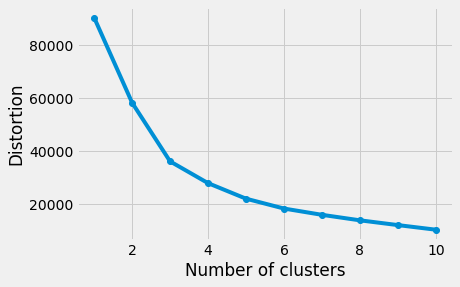

In [5]:
lst_dst = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_std)
    lst_dst.append(km.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

for n_clusters in [2, 3]:
    # 建立 k-means 模型並擬合數據
    km = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = km.fit_predict(X_std)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_std, y_pred)
    print("n_clusters =", n_clusters,
          "所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(X_std, y_pred, 
                                    metric='euclidean')
    y = df['y']
    print('ARI:', adjusted_rand_score(y, y_pred))

n_clusters = 2 所有樣本的輪廓係數平均 = 0.4797869678709137
ARI: 0.0029864243169075767
n_clusters = 3 所有樣本的輪廓係數平均 = 0.5095997936303313
ARI: 0.004135744546747811


In [7]:
t1, t2 = 'yes', 'no'
df_clf = df[(df['y']==t1) | (df['y']==t2)]
df_clf = df_clf[['y','age', 'duration']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['age', 'duration']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)
print(X_std.shape)

[[ 1.60696496  0.0110161 ]
 [ 0.28852927 -0.41612696]
 [-0.74738448 -0.70736086]
 ...
 [ 2.92540065  3.37379688]
 [ 1.51279098  0.97014641]
 [-0.37068857  0.39932797]]
(45211, 2)


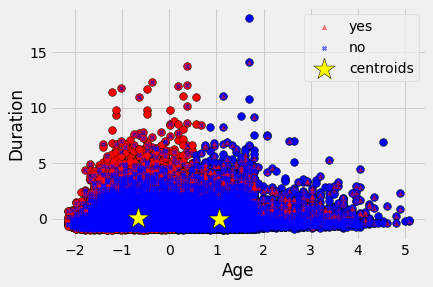

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X_std)

def plt_scatter(X_std, y_pred, km):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std[y_pred==0, 0], 
                X_std[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std[y_pred==1, 0], 
                X_std[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std[idx_0[0], 0], 
                X_std[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std[idx_1[0], 0], 
                X_std[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    plt.scatter(km.cluster_centers_[:, 0], 
                km.cluster_centers_[:, 1], 
                s=500, marker='*', c='yellow', 
                edgecolor='black', label='centroids')
    plt.xlabel('Age')
    plt.ylabel('Duration')
    plt.legend()

plt_scatter(X_std, y_pred, km)

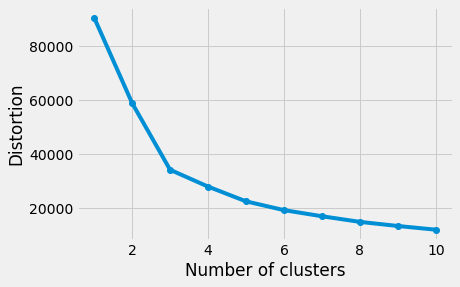

In [9]:
lst_dst = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_std)
    lst_dst.append(km.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

for n_clusters in [2, 3]:
    # 建立 k-means 模型並擬合數據
    km = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = km.fit_predict(X_std)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_std, y_pred)
    print("n_clusters =", n_clusters,
          "所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(X_std, y_pred, 
                                    metric='euclidean')
    y = df['y']
    print('ARI:', adjusted_rand_score(y, y_pred))

n_clusters = 2 所有樣本的輪廓係數平均 = 0.40867082420441714
ARI: -0.001820349687899442
n_clusters = 3 所有樣本的輪廓係數平均 = 0.4680311392742856
ARI: 0.08501706298191794


In [11]:
t1, t2 = 'yes', 'no'
df_clf = df[(df['y']==t1) | (df['y']==t2)]
df_clf = df_clf[['y','age', 'campaign']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['age', 'campaign']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)
print(X_std.shape)

[[ 1.60696496 -0.56935064]
 [ 0.28852927 -0.56935064]
 [-0.74738448 -0.56935064]
 ...
 [ 2.92540065  0.72181052]
 [ 1.51279098  0.39902023]
 [-0.37068857 -0.24656035]]
(45211, 2)


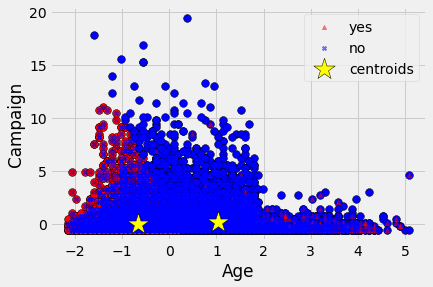

In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X_std)

def plt_scatter(X_std, y_pred, km):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std[y_pred==0, 0], 
                X_std[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std[y_pred==1, 0], 
                X_std[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std[idx_0[0], 0], 
                X_std[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std[idx_1[0], 0], 
                X_std[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    plt.scatter(km.cluster_centers_[:, 0], 
                km.cluster_centers_[:, 1], 
                s=500, marker='*', c='yellow', 
                edgecolor='black', label='centroids')
    plt.xlabel('Age')
    plt.ylabel('Campaign')
    plt.legend()

plt_scatter(X_std, y_pred, km)

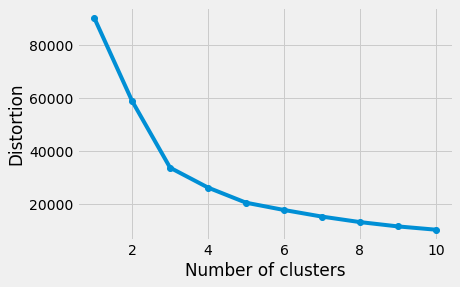

In [13]:
lst_dst = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_std)
    lst_dst.append(km.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

for n_clusters in [2, 3]:
    # 建立 k-means 模型並擬合數據
    km = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = km.fit_predict(X_std)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_std, y_pred)
    print("n_clusters =", n_clusters,
          "所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(X_std, y_pred, 
                                    metric='euclidean')
    y = df['y']
    print('ARI:', adjusted_rand_score(y, y_pred))

n_clusters = 2 所有樣本的輪廓係數平均 = 0.44909006427344417
ARI: -0.00019636225069686661
n_clusters = 3 所有樣本的輪廓係數平均 = 0.4906512113420925
ARI: -0.006974434495561047


In [15]:
t1, t2 = 'yes', 'no'
df_clf = df[(df['y']==t1) | (df['y']==t2)]
df_clf = df_clf[['y','age', 'previous']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['age', 'previous']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)
print(X_std.shape)

[[ 1.60696496 -0.25194037]
 [ 0.28852927 -0.25194037]
 [-0.74738448 -0.25194037]
 ...
 [ 2.92540065  1.05047333]
 [ 1.51279098 -0.25194037]
 [-0.37068857  4.52357654]]
(45211, 2)


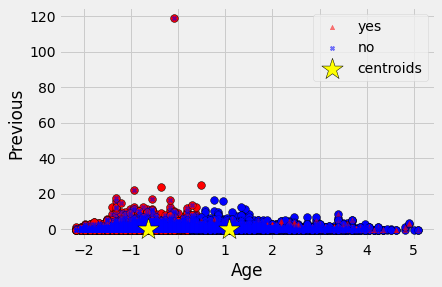

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X_std)

def plt_scatter(X_std, y_pred, km):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std[y_pred==0, 0], 
                X_std[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std[y_pred==1, 0], 
                X_std[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std[idx_0[0], 0], 
                X_std[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std[idx_1[0], 0], 
                X_std[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    plt.scatter(km.cluster_centers_[:, 0], 
                km.cluster_centers_[:, 1], 
                s=500, marker='*', c='yellow', 
                edgecolor='black', label='centroids')
    plt.xlabel('Age')
    plt.ylabel('Previous')
    plt.legend()

plt_scatter(X_std, y_pred, km)

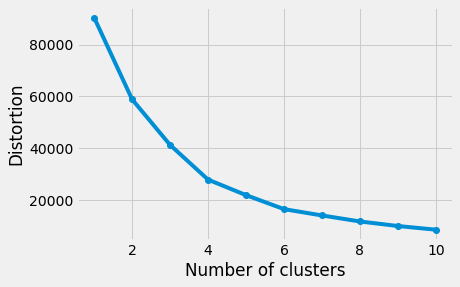

In [17]:
lst_dst = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_std)
    lst_dst.append(km.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

for n_clusters in [2, 4]:
    # 建立 k-means 模型並擬合數據
    km = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = km.fit_predict(X_std)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_std, y_pred)
    print("n_clusters =", n_clusters,
          "所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(X_std, y_pred, 
                                    metric='euclidean')
    y = df['y']
    print('ARI:', adjusted_rand_score(y, y_pred))

n_clusters = 2 所有樣本的輪廓係數平均 = 0.5115737884028153
ARI: 0.001106040521106924
n_clusters = 4 所有樣本的輪廓係數平均 = 0.550245309487957
ARI: 0.01450184593917115


In [19]:
t1, t2 = 'yes', 'no'
df_clf = df[(df['y']==t1) | (df['y']==t2)]
df_clf = df_clf[['y','balance', 'duration']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['balance', 'duration']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)
print(X_std.shape)

[[ 0.25641925  0.0110161 ]
 [-0.43789469 -0.41612696]
 [-0.44676247 -0.70736086]
 ...
 [ 1.42959305  3.37379688]
 [-0.22802402  0.97014641]
 [ 0.52836436  0.39932797]]
(45211, 2)


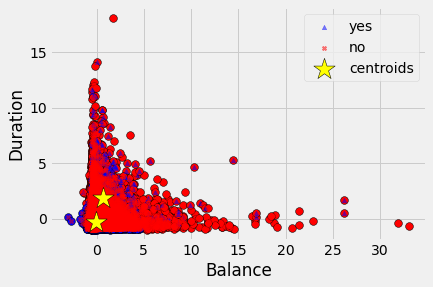

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X_std)

def plt_scatter(X_std, y_pred, km):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std[y_pred==0, 0], 
                X_std[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std[y_pred==1, 0], 
                X_std[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std[idx_0[0], 0], 
                X_std[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std[idx_1[0], 0], 
                X_std[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    plt.scatter(km.cluster_centers_[:, 0], 
                km.cluster_centers_[:, 1], 
                s=500, marker='*', c='yellow', 
                edgecolor='black', label='centroids')
    plt.xlabel('Balance')
    plt.ylabel('Duration')
    plt.legend()

plt_scatter(X_std, y_pred, km)

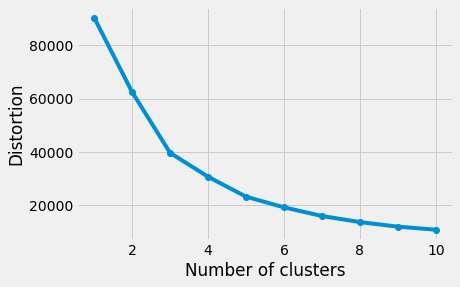

In [21]:
lst_dst = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_std)
    lst_dst.append(km.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

for n_clusters in [2, 3]:
    # 建立 k-means 模型並擬合數據
    km = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = km.fit_predict(X_std)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_std, y_pred)
    print("n_clusters =", n_clusters,
          "所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(X_std, y_pred, 
                                    metric='euclidean')
    y = df['y']
    print('ARI:', adjusted_rand_score(y, y_pred))

n_clusters = 2 所有樣本的輪廓係數平均 = 0.626497185311663
ARI: 0.2772886322341086
n_clusters = 3 所有樣本的輪廓係數平均 = 0.6337603299478503
ARI: 0.25417668388769593


In [23]:
t1, t2 = 'yes', 'no'
df_clf = df[(df['y']==t1) | (df['y']==t2)]
df_clf = df_clf[['y','balance', 'campaign']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['balance', 'campaign']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)
print(X_std.shape)

[[ 0.25641925 -0.56935064]
 [-0.43789469 -0.56935064]
 [-0.44676247 -0.56935064]
 ...
 [ 1.42959305  0.72181052]
 [-0.22802402  0.39902023]
 [ 0.52836436 -0.24656035]]
(45211, 2)


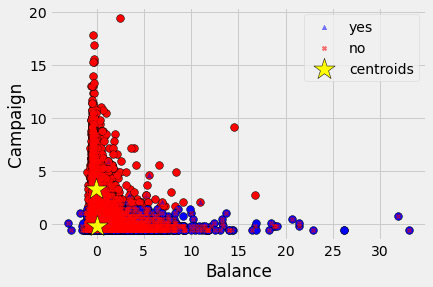

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X_std)

def plt_scatter(X_std, y_pred, km):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std[y_pred==0, 0], 
                X_std[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std[y_pred==1, 0], 
                X_std[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std[idx_0[0], 0], 
                X_std[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std[idx_1[0], 0], 
                X_std[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    plt.scatter(km.cluster_centers_[:, 0], 
                km.cluster_centers_[:, 1], 
                s=500, marker='*', c='yellow', 
                edgecolor='black', label='centroids')
    plt.xlabel('Balance')
    plt.ylabel('Campaign')
    plt.legend()

plt_scatter(X_std, y_pred, km)

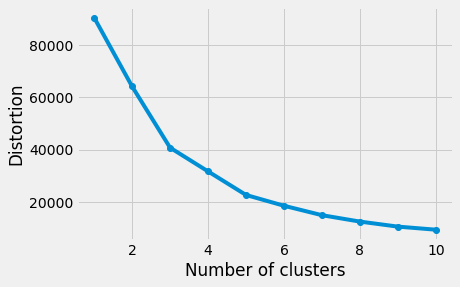

In [25]:
lst_dst = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_std)
    lst_dst.append(km.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

for n_clusters in [2, 3, 5]:
    # 建立 k-means 模型並擬合數據
    km = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = km.fit_predict(X_std)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_std, y_pred)
    print("n_clusters =", n_clusters,
          "所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(X_std, y_pred, 
                                    metric='euclidean')
    y = df['y']
    print('ARI:', adjusted_rand_score(y, y_pred))

n_clusters = 2 所有樣本的輪廓係數平均 = 0.7119012746950165
ARI: -0.03612726690161633
n_clusters = 3 所有樣本的輪廓係數平均 = 0.7262469024772109
ARI: -0.01601761201596828
n_clusters = 5 所有樣本的輪廓係數平均 = 0.6035153355868456
ARI: -0.011492121256253937


In [27]:
t1, t2 = 'yes', 'no'
df_clf = df[(df['y']==t1) | (df['y']==t2)]
df_clf = df_clf[['y','balance', 'previous']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['balance', 'previous']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)
print(X_std.shape)

[[ 0.25641925 -0.25194037]
 [-0.43789469 -0.25194037]
 [-0.44676247 -0.25194037]
 ...
 [ 1.42959305  1.05047333]
 [-0.22802402 -0.25194037]
 [ 0.52836436  4.52357654]]
(45211, 2)


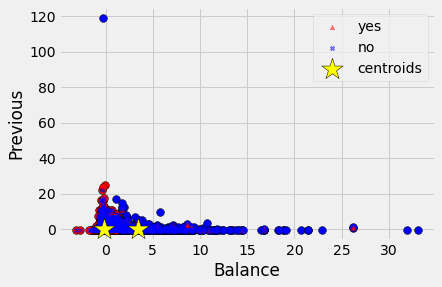

In [28]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X_std)

def plt_scatter(X_std, y_pred, km):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std[y_pred==0, 0], 
                X_std[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std[y_pred==1, 0], 
                X_std[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std[idx_0[0], 0], 
                X_std[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std[idx_1[0], 0], 
                X_std[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    plt.scatter(km.cluster_centers_[:, 0], 
                km.cluster_centers_[:, 1], 
                s=500, marker='*', c='yellow', 
                edgecolor='black', label='centroids')
    plt.xlabel('Balance')
    plt.ylabel('Previous')
    plt.legend()

plt_scatter(X_std, y_pred, km)

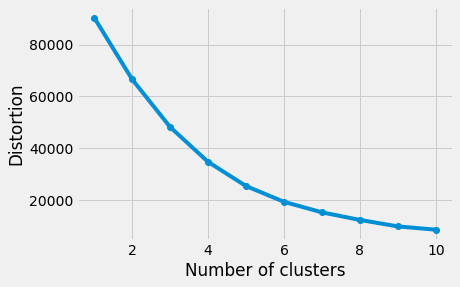

In [29]:
lst_dst = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_std)
    lst_dst.append(km.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

for n_clusters in [2, 3]:
    # 建立 k-means 模型並擬合數據
    km = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = km.fit_predict(X_std)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_std, y_pred)
    print("n_clusters =", n_clusters,
          "所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(X_std, y_pred, 
                                    metric='euclidean')
    y = df['y']
    print('ARI:', adjusted_rand_score(y, y_pred))

n_clusters = 2 所有樣本的輪廓係數平均 = 0.7763232318896239
ARI: 0.018092219136075772
n_clusters = 3 所有樣本的輪廓係數平均 = 0.7822709133662247
ARI: 0.059842346729568195


In [31]:
t1, t2 = 'yes', 'no'
df_clf = df[(df['y']==t1) | (df['y']==t2)]
df_clf = df_clf[['y','duration', 'campaign']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['duration', 'campaign']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)
print(X_std.shape)

[[ 0.0110161  -0.56935064]
 [-0.41612696 -0.56935064]
 [-0.70736086 -0.56935064]
 ...
 [ 3.37379688  0.72181052]
 [ 0.97014641  0.39902023]
 [ 0.39932797 -0.24656035]]
(45211, 2)


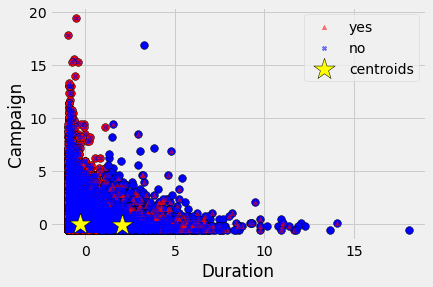

In [32]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X_std)

def plt_scatter(X_std, y_pred, km):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std[y_pred==0, 0], 
                X_std[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std[y_pred==1, 0], 
                X_std[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std[idx_0[0], 0], 
                X_std[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std[idx_1[0], 0], 
                X_std[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    plt.scatter(km.cluster_centers_[:, 0], 
                km.cluster_centers_[:, 1], 
                s=500, marker='*', c='yellow', 
                edgecolor='black', label='centroids')
    plt.xlabel('Duration')
    plt.ylabel('Campaign')
    plt.legend()

plt_scatter(X_std, y_pred, km)

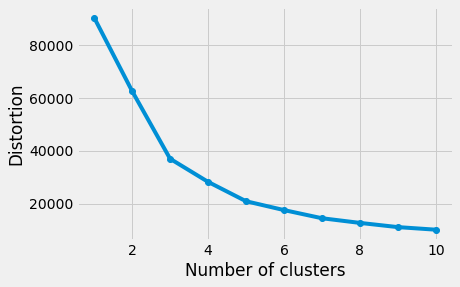

In [33]:
lst_dst = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_std)
    lst_dst.append(km.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

for n_clusters in [2, 3, 5]:
    # 建立 k-means 模型並擬合數據
    km = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = km.fit_predict(X_std)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_std, y_pred)
    print("n_clusters =", n_clusters,
          "所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(X_std, y_pred, 
                                    metric='euclidean')
    y = df['y']
    print('ARI:', adjusted_rand_score(y, y_pred))

n_clusters = 2 所有樣本的輪廓係數平均 = 0.5649059486577789
ARI: 0.2880782817884433
n_clusters = 3 所有樣本的輪廓係數平均 = 0.6120559083017674
ARI: 0.20752171723934054
n_clusters = 5 所有樣本的輪廓係數平均 = 0.49960868236020967
ARI: 0.11360943849879375


In [35]:
t1, t2 = 'yes', 'no'
df_clf = df[(df['y']==t1) | (df['y']==t2)]
df_clf = df_clf[['y','duration', 'previous']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['duration', 'previous']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)
print(X_std.shape)

[[ 0.0110161  -0.25194037]
 [-0.41612696 -0.25194037]
 [-0.70736086 -0.25194037]
 ...
 [ 3.37379688  1.05047333]
 [ 0.97014641 -0.25194037]
 [ 0.39932797  4.52357654]]
(45211, 2)


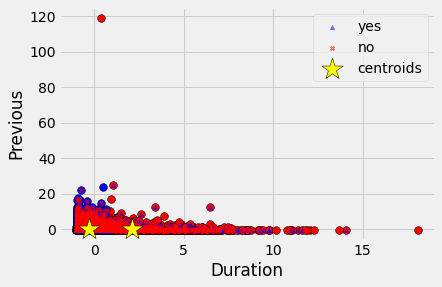

In [36]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X_std)

def plt_scatter(X_std, y_pred, km):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std[y_pred==0, 0], 
                X_std[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std[y_pred==1, 0], 
                X_std[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std[idx_0[0], 0], 
                X_std[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std[idx_1[0], 0], 
                X_std[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    plt.scatter(km.cluster_centers_[:, 0], 
                km.cluster_centers_[:, 1], 
                s=500, marker='*', c='yellow', 
                edgecolor='black', label='centroids')
    plt.xlabel('Duration')
    plt.ylabel('Previous')
    plt.legend()

plt_scatter(X_std, y_pred, km)

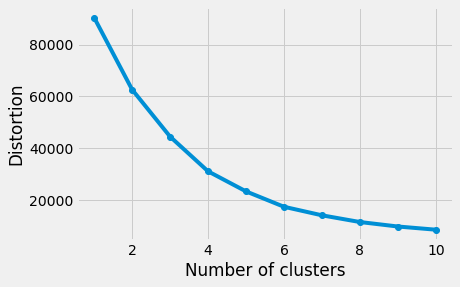

In [37]:
lst_dst = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_std)
    lst_dst.append(km.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

for n_clusters in [2, 4]:
    # 建立 k-means 模型並擬合數據
    km = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = km.fit_predict(X_std)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_std, y_pred)
    print("n_clusters =", n_clusters,
          "所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(X_std, y_pred, 
                                    metric='euclidean')
    y = df['y']
    print('ARI:', adjusted_rand_score(y, y_pred))

n_clusters = 2 所有樣本的輪廓係數平均 = 0.6365458714764067
ARI: 0.288758545846325
n_clusters = 4 所有樣本的輪廓係數平均 = 0.6676551414694507
ARI: 0.27710251742706726


In [39]:
t1, t2 = 'yes', 'no'
df_clf = df[(df['y']==t1) | (df['y']==t2)]
df_clf = df_clf[['y','campaign', 'previous']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['campaign', 'previous']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
print(X_std)
print(X_std.shape)

[[-0.56935064 -0.25194037]
 [-0.56935064 -0.25194037]
 [-0.56935064 -0.25194037]
 ...
 [ 0.72181052  1.05047333]
 [ 0.39902023 -0.25194037]
 [-0.24656035  4.52357654]]
(45211, 2)


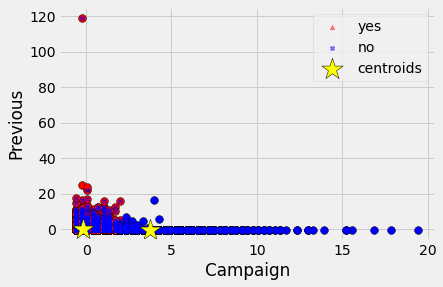

In [40]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X_std)

def plt_scatter(X_std, y_pred, km):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std[y_pred==0, 0], 
                X_std[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std[y_pred==1, 0], 
                X_std[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std[idx_0[0], 0], 
                X_std[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std[idx_1[0], 0], 
                X_std[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    plt.scatter(km.cluster_centers_[:, 0], 
                km.cluster_centers_[:, 1], 
                s=500, marker='*', c='yellow', 
                edgecolor='black', label='centroids')
    plt.xlabel('Campaign')
    plt.ylabel('Previous')
    plt.legend()

plt_scatter(X_std, y_pred, km)

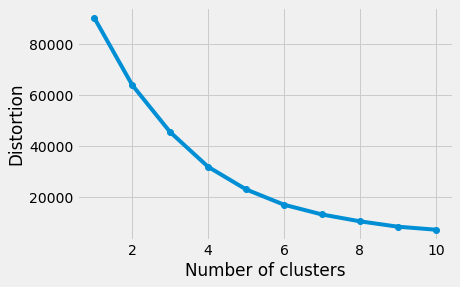

In [41]:
lst_dst = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_std)
    lst_dst.append(km.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

for n_clusters in [2, 3, 4]:
    # 建立 k-means 模型並擬合數據
    km = KMeans(n_clusters=n_clusters, random_state=0)
    y_pred = km.fit_predict(X_std)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_std, y_pred)
    print("n_clusters =", n_clusters,
          "所有樣本的輪廓係數平均 =", silhouette_avg)
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(X_std, y_pred, 
                                    metric='euclidean')
    y = df['y']
    print('ARI:', adjusted_rand_score(y, y_pred))

n_clusters = 2 所有樣本的輪廓係數平均 = 0.7415525494981041
ARI: -0.03598854796995756
n_clusters = 3 所有樣本的輪廓係數平均 = 0.7367920869720819
ARI: 0.029061492282498706
n_clusters = 4 所有樣本的輪廓係數平均 = 0.7351222725779093
ARI: 0.029062065248906515


In [46]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

lst_type = ['yes', 'no']
df_clf = df[df['y']==lst_type[0]]

for i in range(1, len(lst_type)):
    df_clf = df_clf.append(df[df['y']==lst_type[i]])

X = df_clf[['age', 'balance', 'duration', 'campaign', 'previous']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

# 建立 k-means 模型並擬合數據
km = KMeans(n_clusters=2, random_state=0)
y_pred = km.fit_predict(X_std)
# 取出分群結果的標籤
labels = np.unique(y_pred)
# 計算所有樣本的輪廓係數平均值
silhouette_avg = silhouette_score(X_std, y_pred)
print("所有樣本的輪廓係數平均 =", silhouette_avg)
# 計算每個樣本的輪廓係數
silhouette = silhouette_samples(X_std, y_pred, 
                                metric='euclidean')
y = df['y']
print('ARI:', adjusted_rand_score(y, y_pred))

所有樣本的輪廓係數平均 = 0.2481696395040912
ARI: -0.0020509704386148186


17264
27947


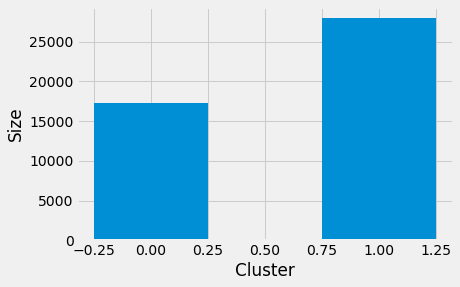

In [47]:
size = np.array([0, 0])
for i, c in enumerate(labels):
    c_silhouette = silhouette[y_pred == c]
    c_silhouette.sort()
    size_cluster_i = c_silhouette.shape[0]
    print(size_cluster_i)
    size += np.array([size_cluster_i, 0])
    
size = size - np.array([size_cluster_i, 0]) + np.array([0, size_cluster_i])
plt.bar(labels, size, width=0.5)
plt.xlabel("Cluster")
plt.ylabel('Size')
plt.show()

In [48]:
df_s = df.sample(n=10000, axis=0)

t1, t2 = 'yes', 'no'
df_clf = df_s[(df_s['y']==t1) | (df_s['y']==t2)]
df_clf = df_clf[['y','duration', 'previous']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['duration', 'previous']]
scaler = StandardScaler().fit(X)
X_std1 = scaler.transform(X)
print(X_std1)
print(X_std1.shape)

[[-0.61782835 -0.18104578]
 [-0.73334177 -0.18104578]
 [-0.92851963 -0.18104578]
 ...
 [-0.701476   -0.18104578]
 [-0.87673775 -0.18104578]
 [ 0.29034619 -0.18104578]]
(10000, 2)


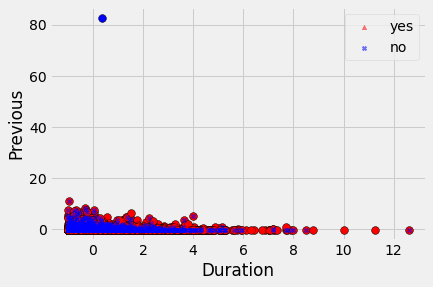

In [49]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, linkage='ward')
model.fit(X_std1)
y_pred = model.fit_predict(X_std1)

def plt_scatter(X_std1, y_pred):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std1[y_pred==0, 0], 
                X_std1[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std1[y_pred==1, 0], 
                X_std1[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std1[y_pred==0]) < len(X_std1[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std1[idx_0[0], 0], 
                X_std1[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std1[idx_1[0], 0], 
                X_std1[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    # plt.scatter(km.cluster_centers_[:, 0], 
    #             km.cluster_centers_[:, 1], 
    #             s=500, marker='*', c='yellow', 
    #             edgecolor='black', label='centroids')
    plt.xlabel('Duration')
    plt.ylabel('Previous')
    plt.legend()

plt_scatter(X_std1, y_pred)

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

X = df_s[['age', 'balance', 'duration', 'campaign', 'previous']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

model = AgglomerativeClustering(n_clusters=2, linkage='ward')
model.fit(X_std)
y_pred = model.fit_predict(X_std)

# 計算所有樣本的輪廓係數平均值
silhouette_avg = silhouette_score(X_std, y_pred)
print("所有樣本的輪廓係數平均 =", silhouette_avg)
# 計算每個樣本的輪廓係數
silhouette = silhouette_samples(X_std, y_pred, 
                                metric='euclidean')
y = df_clf['y']
print('ARI:', adjusted_rand_score(y, y_pred))

所有樣本的輪廓係數平均 = 0.9709588797016453
ARI: -0.00017327332982256652


Text(0, 0.5, 'Cluster distance')

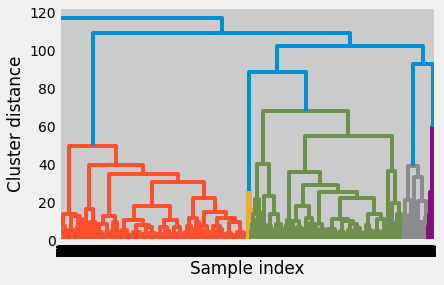

In [51]:
from scipy.cluster import hierarchy

# 繪製樹狀圖
model = hierarchy.linkage(X_std, 'ward')
hierarchy.dendrogram(model, orientation="top")
plt.xlabel("Sample index")
plt.ylabel('Cluster distance')

C:\Users\winni\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


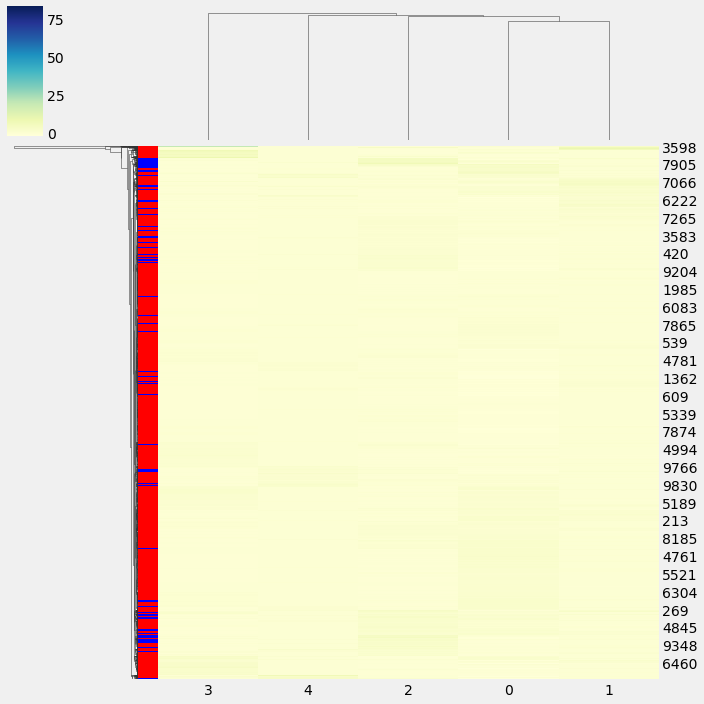

In [52]:
import seaborn as sns

lut = dict(zip(df_s['y'].unique(), "rbg"))
row_colors = df_s['y'].map(lut).to_numpy()
g = sns.clustermap(X_std, cmap='YlGnBu', row_colors=row_colors)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0);

Text(0, 0.5, 'Previous')

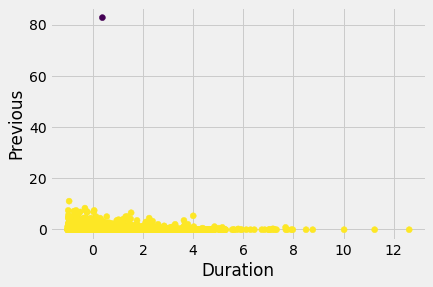

In [53]:
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=5, min_samples=3).fit(X_std1)
    
plt.scatter(X_std1[:,0], X_std1[:,1], c=clf.labels_)
plt.xlabel('Duration')
plt.ylabel('Previous')

In [54]:
X = df_s[['age', 'balance', 'duration', 'campaign', 'previous']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

y_pred = DBSCAN(eps=1, min_samples=2).fit(X_std)
print(pd.Series(y_pred.labels_).value_counts())

 0     9834
-1      115
 2        6
 7        4
 9        4
 18       3
 15       3
 10       3
 6        2
 8        2
 5        2
 4        2
 11       2
 12       2
 13       2
 14       2
 3        2
 16       2
 17       2
 1        2
 19       2
 20       2
dtype: int64


In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

# 計算所有樣本的輪廓係數平均值
silhouette_avg = silhouette_score(X_std, y_pred.labels_)
print("所有樣本的輪廓係數平均 =", silhouette_avg)
# 計算每個樣本的輪廓係數
silhouette = silhouette_samples(X_std, y_pred.labels_, 
                                metric='euclidean')
y = df_clf['y']
print('ARI:', adjusted_rand_score(y, y_pred.labels_))

所有樣本的輪廓係數平均 = 0.2533422102853202
ARI: 0.04572400650118784


[[-0.59021831 -0.28740338]
 [-0.65091977 -0.28740338]
 [ 2.71801123 -0.28740338]
 ...
 [-0.22221571 -0.28740338]
 [ 0.79832757 -0.28740338]
 [ 0.37341736  0.20716041]]
(8000, 2)


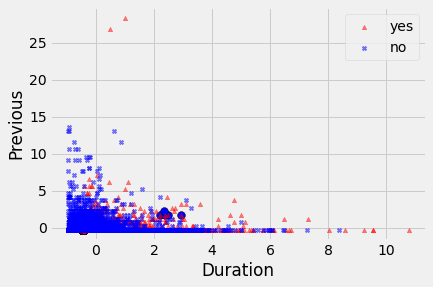

In [56]:
from sklearn.cluster import AffinityPropagation

df_s = df.sample(n=8000, axis=0)

t1, t2 = 'yes', 'no'
df_clf = df_s[(df_s['y']==t1) | (df_s['y']==t2)]
df_clf = df_clf[['y','duration', 'previous']]

# 過濾出兩個屬性
df_clf.reset_index(inplace=True)
idx_0 = [df_clf['y']==t1]
idx_1 = [df_clf['y']==t2]

# 標準化
X = df_clf[['duration', 'previous']]
scaler = StandardScaler().fit(X)
X_std1 = scaler.transform(X)
print(X_std1)
print(X_std1.shape)

clf = AffinityPropagation(damping=0.9, max_iter=1000, random_state=None)
y_pred = clf.fit_predict(X_std1)

def plt_scatter(X_std1, clf):
    # 設定顏色
    c1, c2 = 'red', 'blue'
        
    plt.scatter(X_std1[y_pred==0, 0], 
                X_std1[y_pred==0, 1], 
                color=c1, edgecolor='k', s=60)
    plt.scatter(X_std1[y_pred==1, 0], 
                X_std1[y_pred==1, 1], 
                color=c2, edgecolor='k', s=60)
    
    if len(X_std1[y_pred==0]) < len(X_std1[y_pred==1]):
        c1, c2 = 'blue', 'red'
        
    plt.scatter(X_std1[idx_0[0], 0], 
                X_std1[idx_0[0], 1], 
                color=c1, marker='^', alpha=.5, 
                s=20, label=t1)
    plt.scatter(X_std1[idx_1[0], 0], 
                X_std1[idx_1[0], 1], 
                color=c2, marker='X', alpha=.5, 
                s=20, label=t2)
    # plt.scatter(km.cluster_centers_[:, 0], 
    #             km.cluster_centers_[:, 1], 
    #             s=500, marker='*', c='yellow', 
    #             edgecolor='black', label='centroids')
    plt.xlabel('Duration')
    plt.ylabel('Previous')
    plt.legend()

plt_scatter(X_std1, clf)

In [57]:
X = df_s[['age', 'balance', 'duration', 'campaign', 'previous']]
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

clf = AffinityPropagation(damping=0.9, max_iter=1000, random_state=None)
y_pred = clf.fit_predict(X_std)
print(pd.Series(y_pred).value_counts())

219    150
191    140
200    138
22     128
186    113
      ... 
44       1
50       1
58       1
82       1
272      1
Length: 273, dtype: int64


In [58]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

# 取出分群結果的標籤
labels = np.unique(y_pred)
# 計算所有樣本的輪廓係數平均值
silhouette_avg = silhouette_score(X_std, y_pred)
print("所有樣本的輪廓係數平均 =", silhouette_avg)
# 計算每個樣本的輪廓係數
silhouette = silhouette_samples(X_std, y_pred, 
                                metric='euclidean')
y = df_clf['y']
print('ARI:', adjusted_rand_score(y, y_pred))

所有樣本的輪廓係數平均 = 0.18795094702627962
ARI: 0.0018116169449068566
